In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master

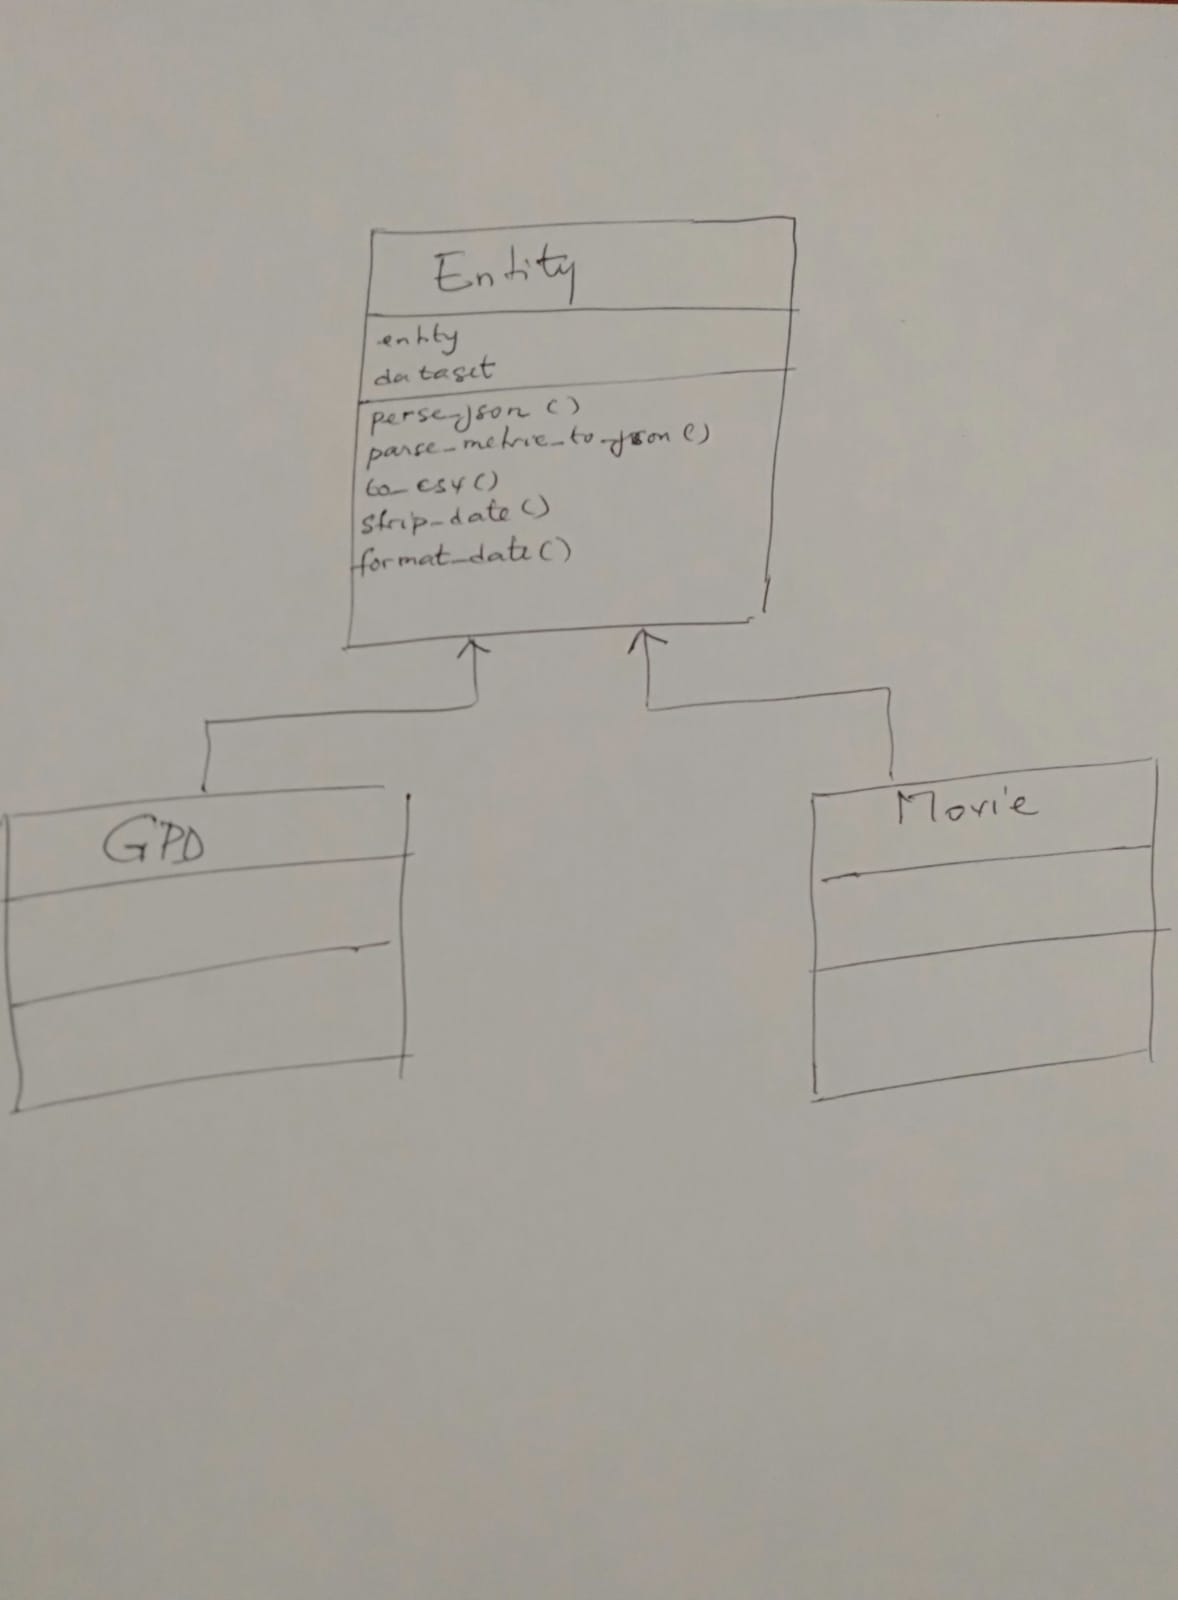

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("data/dataset.csv")

In [83]:
len(df)

37

In [38]:
## 1. Distribution des films par catégorie 

In [54]:
data = df.set_index('type')
data.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama                           Hababam Sinifi
Comedy; Drama              Maratonci trce pocasni krug
Drama                                       Les Évadés
Drama                                  Soorarai Pottru
Drama                                          Peranbu
Drama                                C/o Kancharapalem
Crime; Mystery;                               Aynabaji
Crime; Drama                                Le parrain
Crime; Drama                   Le parrain, 2ème partie
Crime; Drama                       12 Hommes en colère
Drama; History                           Aloko Udapadi
Drama; Family                                Natsamrat
Comedy; Drama;                         Love on a Leash
Action; Crime;     The Dark Knight : Le Chevalier noir
Comedy; History                             Tosun Pasa
Biography; Dram                             Al-risâlah
Comedy; Family;                          Süt Kardesler
Comedy                    Hababam Sinifi Sinifta Kaldi
Name:

In [57]:
## 2. Top 50 des budgets des films
df[['budget en $', 'title']].sort_values('budget en $', ascending=True).head(50)

,budget en $,title
14,13000000.0,"Le parrain, 2ème partie"
10,185000000.0,The Dark Knight : Le Chevalier noir
4,2057316.8,Soorarai Pottru
1,25000000.0,Les Évadés
15,350000.0,12 Hommes en colère
2,412573.44,Aynabaji
3,6000000.0,Le parrain
7,659755.24,Aloko Udapadi
5,960081.17,Peranbu
0,xxx,Hababam Sinifi


In [33]:
## 3. Nombre de films sortie par décennie

In [58]:
df['release date'] = pd.to_datetime(df['release date'])
data = df.set_index('release date')
data.groupby((data.index.year//10)*10).sum()


,rating,vote,reviews
release date,,,
1950,9.0,706158,1790
1970,63.3,2921013,5669
1980,9.0,14756,13
1990,9.3,2394410,9082
2000,9.0,2356223,7413
2010,54.2,61937,901
2020,9.1,78639,1953


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [62]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=True).head(10)

,title,Cumulate Worldwide Gross en $
10,The Dark Knight : Le Chevalier noir,1005973645
3,Le parrain,246120986
1,Les Évadés,28817291
5,Peranbu,3417
14,"Le parrain, 2ème partie",48035783
8,Natsamrat,633
15,12 Hommes en colère,955
13,Al-risâlah,xxx
12,Maratonci trce pocasni krug,xxx
11,Tosun Pasa,xxx


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [65]:
df[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=True).tail(5)

,title,Cumulate Worldwide Gross en $
6,C/o Kancharapalem,xxx
4,Soorarai Pottru,xxx
2,Aynabaji,xxx
9,Love on a Leash,xxx
17,Hababam Sinifi Sinifta Kaldi,xxx


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [66]:
data = df
data = data.set_index('budget en $')
data.groupby(by='vote', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('vote', ascending=False)

,title,vote
budget en $,,
25000000.0,Les Évadés,2394410
185000000.0,The Dark Knight : Le Chevalier noir,2356223
6000000.0,Le parrain,1658631
13000000.0,"Le parrain, 2ème partie",1153041
350000.0,12 Hommes en colère,706158
2057316.8,Soorarai Pottru,78639
xxx,Hababam Sinifi,38163
412573.44,Aynabaji,23835
xxx,Hababam Sinifi Sinifta Kaldi,22208


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [67]:
data = df
data = df.set_index('type')
data.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).head().sort_values('gross en $', ascending=False)

,title,gross en $
type,,
Comedy; Drama,Hababam Sinifi,xxx
Comedy; Drama,Maratonci trce pocasni krug,xxx
Drama,Soorarai Pottru,xxx
Drama,Peranbu,3417
Drama,Les Évadés,28699976


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [68]:
def convert_(x):
    if x in 'xxx':
        return 1
    else:
        return float(x)
def roi(data):
    return '' + data['budget en $']/data['Cumulate Worldwide Gross en $']

d = df
d['budget en $'] = d['budget en $'].apply(lambda x: convert_(x))
d['Cumulate Worldwide Gross en $'] = d['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))


In [69]:
d['roi'] = d['budget en $']/d['Cumulate Worldwide Gross en $']
d['roi']
d.pivot_table(values='roi', index='title').sort_values('roi', ascending=False)

,roi
title,
Soorarai Pottru,2.057317e+06
Aloko Udapadi,6.597552e+05
Aynabaji,4.125734e+05
12 Hommes en colère,3.664921e+02
Peranbu,2.809720e+02
Al-risâlah,1.000000e+00
Süt Kardesler,1.000000e+00
Maratonci trce pocasni krug,1.000000e+00
Love on a Leash,1.000000e+00


In [45]:
## 8. Note moyenne par année de sortie de film

In [70]:
data = df.set_index('release date')
data.groupby(by=data.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
1976,26.8
1975,18.3
2016,18.2
1995,9.3
1972,9.2
2020,9.1
1957,9.0
1977,9.0
1982,9.0


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budget des films sorties par pays par année

In [73]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [75]:
d.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Arabia,Bangladesh,India,Lanka,Turkey,UK,USA,Yugoslavia
release date,,,,,,,,
1957-09-04,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN
1972-10-18,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN
1975-04-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1975-08-27,NaN,NaN,NaN,NaN,NaN,NaN,13000000.0,NaN
1976-01-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1977-09-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1995-03-01,NaN,NaN,NaN,NaN,NaN,NaN,25000000.0,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [76]:
data = df
data['score'] = data['score'].apply(lambda x: convert_int(x))
data_pivot = data.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Action; Crime;,Biography; Dram,Comedy,Comedy; Drama,Comedy; Drama;,Comedy; Family;,Comedy; History,Crime; Drama,Crime; Mystery;,Drama,Drama; Family,Drama; History
writter,,,,,,,,,,,,
Abhijeet Shirish Deshpande,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
Dusan Kovacevic,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fen Tian,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Francis Ford Coppola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN
H.A.L. Craig,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jonathan Nolan,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mario Puzo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
Nazim Hikmet,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Ram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [77]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
Abhijeet Shirish Deshpande      0.0
Dusan Kovacevic                 0.0
Fen Tian                        0.0
Francis Ford Coppola           90.0
H.A.L. Craig                    0.0
Jonathan Nolan                 84.0
Mario Puzo                    100.0
Nazim Hikmet                    0.0
Ram                             0.0
Reginald Rose                  96.0
Rifat Ilgaz                     0.0
Sadik Sendil                    0.0
Saman Weeraman                  0.0
Stephen King                   80.0
Sudha Kongara                   0.0
Syed Gaosul Alam Shaon          0.0
Umur Bugay                      0.0
Venkatesh Maha                  0.0
dtype: float64

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

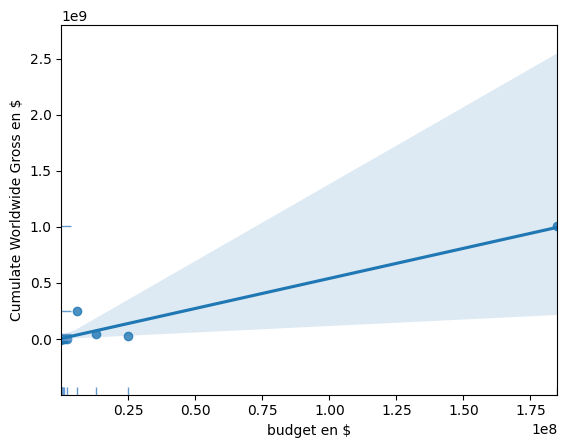

In [80]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=d, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(d["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(d["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)